In [1]:
import sys
sys.path.append('../')

from src import *

In [2]:
df = load_data("../data/raw/Iris.csv")
data = preprocess_data(df)
X = data.drop(columns=['Id', 'Species'])
columns_names = X.columns
y = data['Species']
X = data_normalize(X)
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)

Data loaded successfully.
4 outliers removed.
Data normalized successfully.
Data split successfully.


In [3]:
dim = 2
encoder = build_encoder(dim, X_train.shape[1])
decoder = build_decoder(dim, X_train.shape[1])

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │      1,280 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean_layer[0][… │
│                     │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,692 (166.77 KB)

 Trainable params: 42,692 (166.77 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,564 (166.27 KB)

 Trainable params: 42,564 (166.27 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
vae = VAE(encoder, decoder)

In [5]:
from tensorflow.keras import optimizers

optmizer = optimizers.Adam(learning_rate=0.00005)
vae.compile(optimizer=optmizer)

In [6]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [7]:
vae.fit(
    X_train, 
    epochs=20, 
    batch_size=4, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint]
)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - kl_loss: 0.0165 - reconstruction_loss: 0.6974 - total_loss: 0.7139 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0062 - reconstruction_loss: 0.6822 - total_loss: 0.6884 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - kl_loss: 0.0020 - reconstruction_loss: 0.6639 - total_loss: 0.6659 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 0.0015 - reconstruction_loss: 0.6403 - total_loss: 0.6418 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - kl_loss: 0.0014 - reconstruction_loss: 0.6446 - total_loss: 0.6460 - val_kl_loss: 0.0000e+00 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


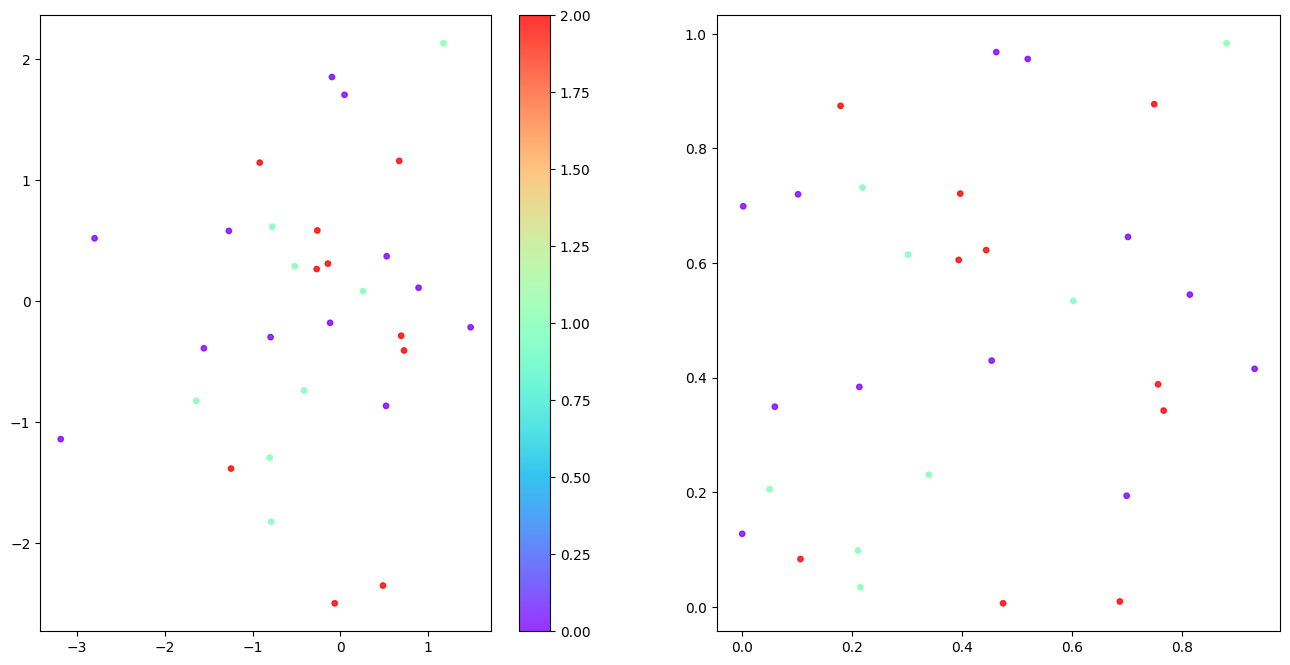

In [8]:
plot_latent_space(encoder, X_test, y_test)

In [9]:
z_mean, z_log_var, reconstructions, example_labels = predict(vae, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


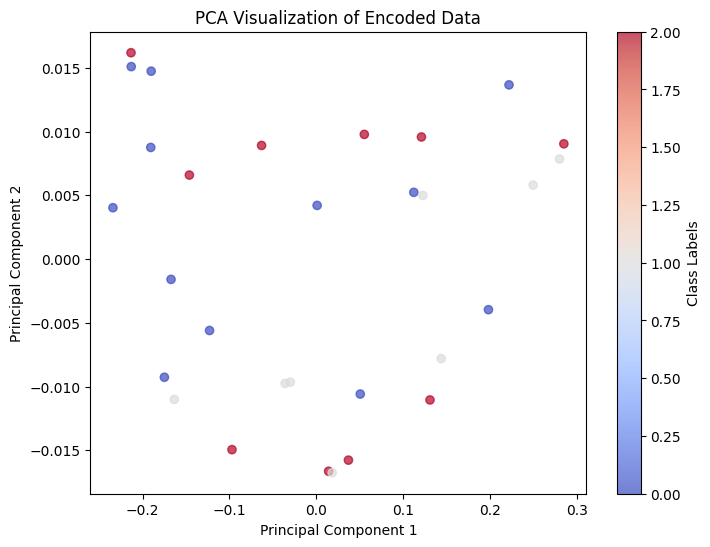

Explained variance ratio: [0.99504775 0.00437488]


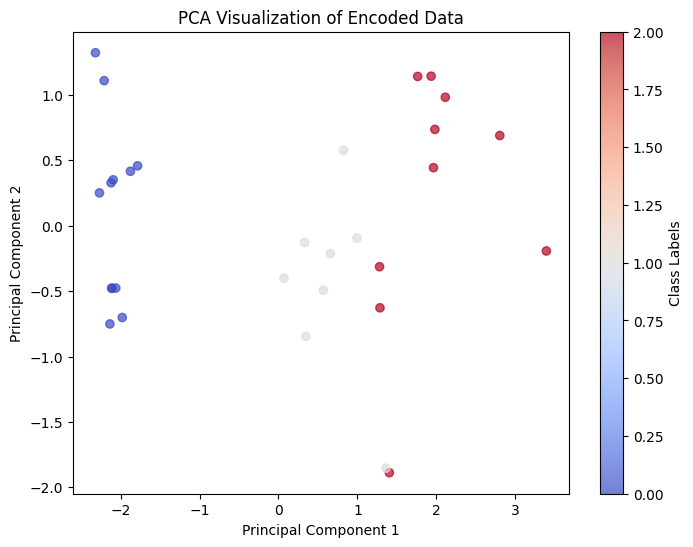

Explained variance ratio: [0.80812541 0.1538968 ]


In [10]:
plot_reduced_pca(reconstructions, example_labels)
plot_reduced_pca(X_test, example_labels)